# Predicting customer satisfaction using Classification
### Machine Learning Zoomcamp - Midterm Project
Binary classification project for the Santander Customer Satisfaction competition hosted on Kaggle.  

In [1]:
# !pip install -U kaggle

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Set up Kaggle API Key

In [ ]:
# Create a .kaggle directory and an empty kaggle.json file
!mkdir -p ~/.kaggle
!touch ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Fill in your Kaggle user name and key
import os
import json
kaggle_username = "FILL_IN_USERNAME"
kaggle_key = "FILL_IN_KEY"

# Save API token the kaggle.json file
file_path = os.path.expanduser('~/.kaggle/kaggle.json')
with open(file_path, "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [ ]:
!ls -l ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c santander-customer-satisfaction

In [ ]:
!unzip -o santander-customer-satisfaction.zip -d data

## 1. Exploratory Data Analysis (EDA)

In [3]:
df = pd.read_csv('data/train.csv')

In [4]:
# df.info(verbose=True, show_counts=True)

In [5]:
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [6]:
# Missing values
df.isnull().mean()

ID                         0.0
var3                       0.0
var15                      0.0
imp_ent_var16_ult1         0.0
imp_op_var39_comer_ult1    0.0
                          ... 
saldo_medio_var44_hace3    0.0
saldo_medio_var44_ult1     0.0
saldo_medio_var44_ult3     0.0
var38                      0.0
TARGET                     0.0
Length: 371, dtype: float64

### Unsatisfied customer ratio

In [7]:
# Target ratio
df.TARGET.value_counts() / df.shape[0]

TARGET
0    0.960431
1    0.039569
Name: count, dtype: float64

Only 4% of records are labeled as unsatisfied customers (class 1).

### Correlation

In [10]:
corr = df.corrwith(df.TARGET).abs()
print(corr.sort_values(ascending=False)[0:50])

TARGET                          1.000000
ind_var30                       0.149811
num_meses_var5_ult3             0.148253
num_var30                       0.138289
num_var42                       0.135693
ind_var5                        0.135349
num_var5                        0.134095
var36                           0.102919
var15                           0.101322
num_var4                        0.080194
num_var35                       0.076872
ind_var8_0                      0.046665
num_var8_0                      0.046622
ind_var13                       0.039612
ind_var13_0                     0.039471
num_var13                       0.038400
ind_var12_0                     0.038215
num_var13_0                     0.038045
saldo_var30                     0.037092
ind_var39_0                     0.035045
ind_var13_corto                 0.034438
num_var13_corto                 0.034432
num_meses_var13_corto_ult3      0.034367
ind_var13_corto_0               0.034337
ind_var12       

## 2. Data cleaning and preparation

In [11]:
df_full_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [12]:
# Drop 'ID' column
del df_full_train['ID']
del df_test['ID']

In [13]:
# Drop columns with constant values (std = 0)
cols = df_full_train.columns
constant_cols = [col for col in cols if df_full_train[col].std() == 0]
constant_cols

['ind_var2_0',
 'ind_var2',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var28',
 'saldo_var27',
 'saldo_var41',
 'saldo_var46',
 'imp_amort_var18_hace3',
 'imp_amort_var34_hace3',
 'imp_reemb_var13_hace3',
 'imp_reemb_var33_hace3',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_reemb_var13_hace3',
 'num_reemb_var33_hace3',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'saldo_var2_ult1',
 'saldo_medio_var13_medio_hace3']

In [14]:
df_full_train.drop(constant_cols, axis=1, inplace=True)
df_test.drop(constant_cols, axis=1, inplace=True)

In [15]:
# Drop duplicated columns
duplicated_columns = []
cols = df_full_train.columns

for i, col in enumerate(cols[:-1]):
    for j in range(i+1, len(cols)):
        if np.array_equal(df_full_train[col].values, df_full_train[cols[j]].values):
            duplicated_columns.append(cols[j])

np.unique(duplicated_columns)

array(['delta_num_reemb_var13_1y3', 'delta_num_reemb_var17_1y3',
       'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_in_1y3',
       'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_in_1y3',
       'delta_num_trasp_var33_out_1y3', 'ind_var13_medio', 'ind_var18',
       'ind_var25', 'ind_var26', 'ind_var29', 'ind_var29_0', 'ind_var32',
       'ind_var34', 'ind_var37', 'ind_var39', 'num_var13_medio',
       'num_var18', 'num_var25', 'num_var26', 'num_var29', 'num_var29_0',
       'num_var32', 'num_var34', 'num_var37', 'num_var39',
       'saldo_medio_var13_medio_ult1', 'saldo_var29'], dtype='<U29')

In [16]:
df_full_train.drop(duplicated_columns, axis=1, inplace=True)
df_test.drop(duplicated_columns, axis=1, inplace=True)

### 'var3'

Missing values are coded as -999999.

In [17]:
df_full_train.var3.value_counts()

var3
 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: count, Length: 208, dtype: int64

In [18]:
df_test.var3.value_counts()

var3
 2         73962
-999999      120
 8           116
 9           108
 13          107
           ...  
 113           1
 220           1
 199           1
 101           1
 225           1
Name: count, Length: 199, dtype: int64

In [19]:
# Missing values are cded as -999999. Replace them as 2 (most common value)
for df in [df_full_train, df_test]:
    df['var3'] = df['var3'].replace(to_replace=-999999, value=2)

In [20]:
df_full_train.describe().round()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.0,76020.0,76020.0,76020.0,76020.0,76020.0,76020.0,76020.0,76020.0,76020.0,...,76020.0,76020.0,76020.0,76020.0,76020.0,76020.0,76020.0,76020.0,76020.0,76020.0
mean,3.0,33.0,86.0,72.0,120.0,4.0,6.0,0.0,1.0,3.0,...,8.0,1.0,12.0,9.0,32.0,2.0,76.0,57.0,117236.0,0.0
std,9.0,13.0,1615.0,339.0,546.0,93.0,154.0,31.0,37.0,95.0,...,456.0,114.0,783.0,538.0,2013.0,148.0,4040.0,2853.0,182665.0,0.0
min,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5164.0,0.0
25%,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67871.0,0.0
50%,2.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106409.0,0.0
75%,2.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118756.0,0.0
max,238.0,105.0,210000.0,12888.0,21025.0,8238.0,11074.0,6600.0,6600.0,8238.0,...,50004.0,20386.0,138832.0,91779.0,438329.0,24650.0,681463.0,397884.0,22034739.0,1.0


### Split data

In [21]:
df_train, df_val = train_test_split(df_full_train, test_size=0.20, random_state=1)

In [22]:
display(df_train.shape)
display(df_val.shape)
display(df_test.shape)

(60816, 307)

(15204, 307)

(75818, 306)

In [23]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [24]:
y_train = df_train['TARGET'].values
y_val = df_val['TARGET'].values

del df_train['TARGET']
del df_val['TARGET']

### Transform data into vectors

In [25]:
from sklearn.feature_extraction import DictVectorizer

In [26]:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

In [27]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

## 3. Decision tree classification using Scikit-Learn

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

### 3.1 Training with default parameters

In [21]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
# dt.predict_proba(X_val) returns
# [probability of class 0, probability of class 1]
dt.predict_proba(X_val)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [23]:
# Validation
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.5758707319508205

In [24]:
# Evaluate AUC on the training dataset
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

0.999320440276767

### 3.2 Decision tree parameter tuning

In [25]:
# Training models with different values of max_depth
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, None]

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.675
   2 -> 0.772
   3 -> 0.798
   4 -> 0.803
   5 -> 0.806
   6 -> 0.811
   7 -> 0.812
   8 -> 0.816
   9 -> 0.812
  10 -> 0.807
  15 -> 0.762
  20 -> 0.685
None -> 0.572


In [26]:
# Training models with different values of min_samples_leaf
scores = []

for depth in [6, 7, 8, 9]:
    for s in [1, 5, 10, 15, 20, 50, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((depth, s, auc))

In [27]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [28]:
df_scores_pivot = df_scores.pivot(
    index='min_samples_leaf', columns=['max_depth'], values=['auc']
)
df_scores_pivot.round(3)

auc                     
max_depth             6      7      8      9
min_samples_leaf                            
1                 0.811  0.812  0.816  0.811
5                 0.817  0.812  0.803  0.803
10                0.812  0.807  0.801  0.798
15                0.813  0.809  0.808  0.809
20                0.815  0.811  0.808  0.805
50                0.817  0.814  0.809  0.809
100               0.816  0.820  0.818  0.816
200               0.818  0.819  0.817  0.816
500               0.815  0.817  0.818  0.817

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

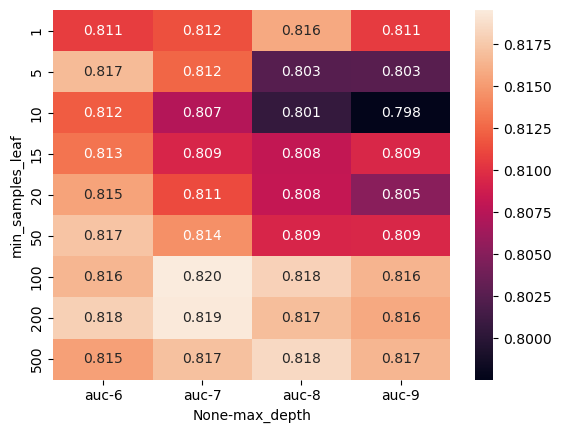

In [29]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [30]:
# Training final decision tree model
dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=200)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=200)

In [31]:
# Evaluate AUC on the training dataset
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

0.8443083674290125

In [32]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- saldo_var30 <= 2.45
|   |--- var15 <= 27.50
|   |   |--- var38 <= 57022.04
|   |   |   |--- var15 <= 23.50
|   |   |   |   |--- var38 <= 37418.27
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- var38 >  37418.27
|   |   |   |   |   |--- var38 <= 46096.10
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- var38 >  46096.10
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- var15 >  23.50
|   |   |   |   |--- class: 0
|   |   |--- var38 >  57022.04
|   |   |   |--- var15 <= 25.50
|   |   |   |   |--- num_var45_hace3 <= 1.50
|   |   |   |   |   |--- var38 <= 124683.15
|   |   |   |   |   |   |--- var38 <= 117271.36
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- var38 >  117271.36
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- var38 >  124683.15
|   |   |   |   |   |   |--- var38 <= 247136.88
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- var38 >  247136.88
|   |   |   |   |   |   |   |--- class

### 3.3 Evaluating AUC scores

In [33]:
# Validation
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8193982033761972

In [34]:
thresholds = np.linspace(0, 1, 21)

scores_th = []

for t in thresholds:
    score = roc_auc_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores_th.append(score)

0.00 0.500
0.05 0.748
0.10 0.689
0.15 0.654
0.20 0.575
0.25 0.510
0.30 0.510
0.35 0.500
0.40 0.500
0.45 0.500
0.50 0.500
0.55 0.500
0.60 0.500
0.65 0.500
0.70 0.500
0.75 0.500
0.80 0.500
0.85 0.500
0.90 0.500
0.95 0.500
1.00 0.500


Text(0, 0.5, 'AUC score')

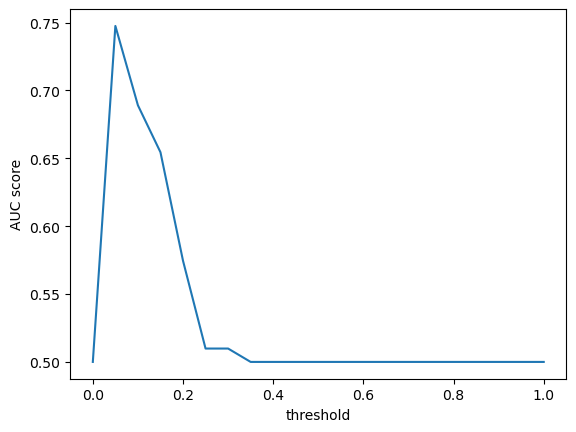

In [35]:
plt.plot(thresholds, scores_th)
plt.xlabel("threshold")
plt.ylabel("AUC score")

### 3.4 Submit solution to Kaggle

Make predictions

In [36]:
y_pred_sub = dt.predict_proba(X_test)[:, 1]
y_pred_sub

array([0.05387205, 0.05387205, 0.00050556, ..., 0.00384615, 0.08053691,
       0.00050556])

In [37]:
predictions = [int(value) for value in (y_pred_sub >= 0.05)]

Prepare and submit file

In [38]:
df_sub = pd.read_csv('data/sample_submission.csv')

In [39]:
df_sub['TARGET'] = np.array(predictions)

In [40]:
df_sub.tail()

,ID,TARGET
75813,151831,1
75814,151832,0
75815,151833,0
75816,151834,1
75817,151837,0


In [41]:
df_sub.to_csv("submission_dt.csv", index=False)

In [ ]:
!kaggle competitions submit -c santander-customer-satisfaction -f submission_dt.csv -m "dt submission"

View submissions

In [ ]:
!kaggle competitions submissions -c santander-customer-satisfaction

publicScore 0.74019, privateScore 0.72819

## 4. Random forest classification using Scikit-Learn 

In [44]:
from sklearn.ensemble import RandomForestClassifier

### 4.1 Training with default parameters

In [45]:
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [46]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.763565286595809

#### Feature importance 

In [53]:
feat_importance = pd.DataFrame(
    {
        'feature': list(dv.get_feature_names_out()),
        'importance': rf.feature_importances_
    }
).sort_values(by='importance', ascending=False)

In [67]:
feat_importance[feat_importance.importance >= 0.005]

,feature,importance
305,var38,0.381143
301,var15,0.179429
271,saldo_medio_var5_ult3,0.030642
269,saldo_medio_var5_hace3,0.027135
227,num_var45_ult3,0.020721
289,saldo_var30,0.016953
225,num_var45_hace3,0.016250
268,saldo_medio_var5_hace2,0.015723
224,num_var45_hace2,0.014947
296,saldo_var42,0.014197


### 4.2 Random forest parameter tuning

In [79]:
# Prepare data with most important features
cols_imp = list(feat_importance[feat_importance.importance >= 0.005].feature)

train_dicts = df_train[cols_imp].to_dict(orient='records')
val_dicts = df_val[cols_imp].to_dict(orient='records')
test_dicts = df_test[cols_imp].to_dict(orient='records')

In [82]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [83]:
# Training models with different values of n_estimators
scores = []

for n in range(10, 201, 10):
    # n_estimators = number of models or trees
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((n, auc))

In [84]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

Text(0, 0.5, 'AUC score')

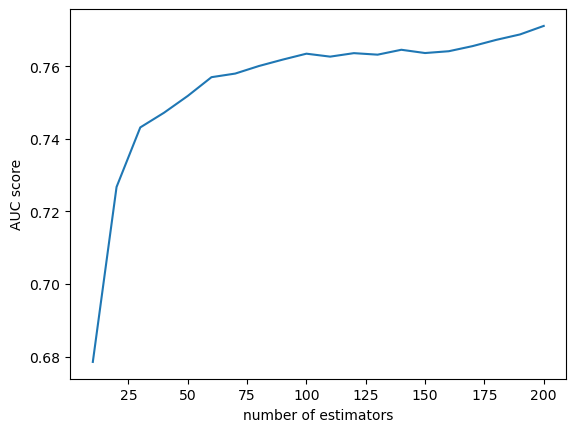

In [85]:
plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel("number of estimators")
plt.ylabel("AUC score")

Best AUC score at ~200 trees.

In [86]:
# Training models with different values of max_depth
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [87]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.802227
1,5,20,0.803269
2,5,30,0.805038
3,5,40,0.807115
4,5,50,0.806033


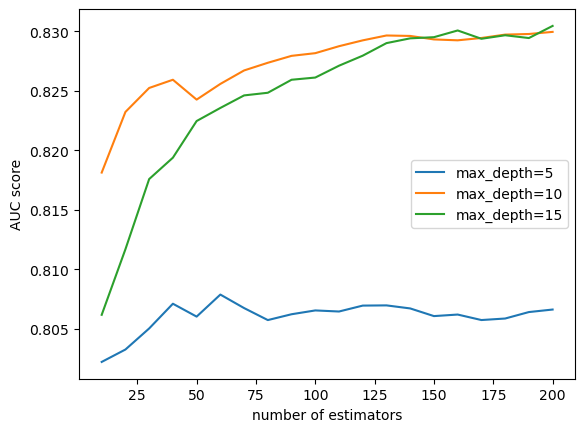

In [88]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%d' % d)
    plt.xlabel("number of estimators")
    plt.ylabel("AUC score")

plt.legend()

Best AUC score at max_depth=15

In [89]:
# Training models with different values of max_depth
scores = []

for d in [5, 10, 15]:
    for n in range(200, 601, 100):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [90]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,200,0.806627
1,5,300,0.806395
2,5,400,0.807088
3,5,500,0.806746
4,5,600,0.806755


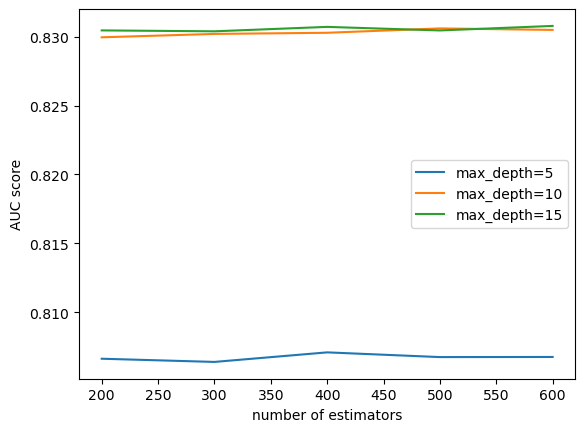

In [91]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%d' % d)
    plt.xlabel("number of estimators")
    plt.ylabel("AUC score")

plt.legend()

In [92]:
max_depth = 15

In [93]:
# Training models with different values of min_samples_leaf
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [95]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

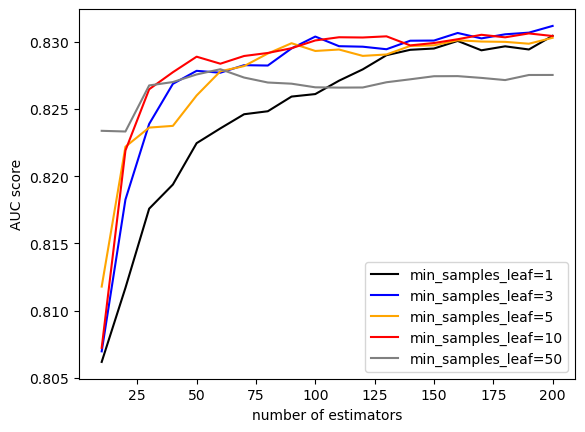

In [96]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]

    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col, label='min_samples_leaf=%d' % s)
    plt.xlabel("number of estimators")
    plt.ylabel("AUC score")

plt.legend()

Best AUC score at min_samples_leaf=3

In [97]:
min_samples_leaf = 3

### Training final random forest model

In [98]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [102]:
# Validation
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8311875319655404

In [103]:
# Evaluate AUC on the training dataset
y_pred = rf.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

0.9459579904975464

### Evaluating AUC scores

In [105]:
# Validation
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8311875319655404

In [106]:
thresholds = np.linspace(0, 1, 21)

scores_th = []

for t in thresholds:
    score = roc_auc_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores_th.append(score)

0.00 0.500
0.05 0.760
0.10 0.716
0.15 0.666
0.20 0.589
0.25 0.526
0.30 0.508
0.35 0.503
0.40 0.501
0.45 0.501
0.50 0.500
0.55 0.500
0.60 0.500
0.65 0.500
0.70 0.500
0.75 0.500
0.80 0.500
0.85 0.500
0.90 0.500
0.95 0.500
1.00 0.500


Text(0, 0.5, 'AUC score')

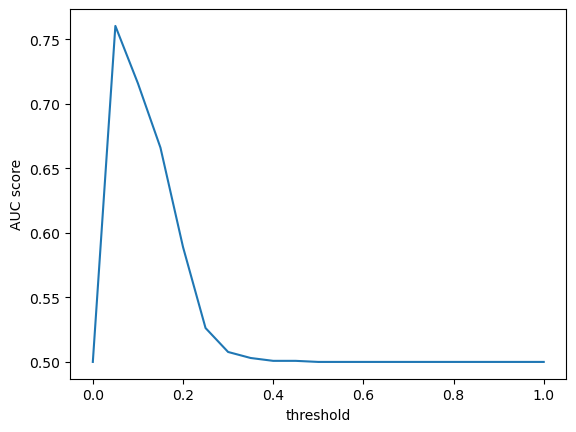

In [107]:
plt.plot(thresholds, scores_th)
plt.xlabel("threshold")
plt.ylabel("AUC score")

Due to class imbalance, for threshold values greater than 0.20, the ROC AUC score is below 0.5, which suggests that the model is performing no better than random chance.

### Submit solution to Kaggle

Make predictions

In [108]:
y_pred_sub = rf.predict_proba(X_test)[:, 1]
y_pred_sub

array([0.02965723, 0.03939113, 0.00049768, ..., 0.0021925 , 0.04966634,
       0.00027886])

In [109]:
predictions = [int(value) for value in (y_pred_sub >= 0.05)]

Prepare and submit file

In [110]:
df_sub = pd.read_csv('data/sample_submission.csv')

In [111]:
df_sub['TARGET'] = np.array(predictions)

In [112]:
df_sub.tail()

,ID,TARGET
75813,151831,1
75814,151832,0
75815,151833,0
75816,151834,0
75817,151837,0


In [113]:
df_sub.to_csv("submission_rf.csv", index=False)

In [ ]:
!kaggle competitions submit -c santander-customer-satisfaction -f submission_rf.csv -m "rf submission"

#### View submissions

In [ ]:
!kaggle competitions submissions -c santander-customer-satisfaction

publicScore   0.74711, privateScore 0.73271

## 5. Classification using XGBoost

In [28]:
import xgboost as xgb

In [29]:
# Prepare data with all features
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

In [30]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [31]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
dtest = xgb.DMatrix(X_test, feature_names=features)

### 5.1 Training with default parameters

In [32]:
xgb_params = {
    'eta': 0.3,  # learning rate
    'max_depth': 6,  # Maximum depth of a tree
    'min_child_weight': 1,  # similar to min_samples_leaf

    'objective': 'binary:logistic',
    'nthread': 8,  # Number of parallel threads used to run XGBoost

    'seed': 1,
    'verbosity': 1,  # Verbosity of printing messages
}

# num_boost_round => Number of boosting iterations.
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [33]:
y_pred = model.predict(dval)

In [34]:
roc_auc_score(y_val, y_pred)

0.8344979210969784

In [35]:
# evals => List of validation sets for which metrics will evaluated during training
watchlist = [(dtrain, 'train'), (dval, 'val')]

Add an evaluation metric at each boosting stage:

In [36]:
%%capture output 
# saves evaluation logs as 'output'

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

# Print evaluation scores every 'verbose_eval' boosting stages
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5, evals=watchlist)

In [37]:
s = output.stdout

In [38]:
# Extract scores from 'output'
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [39]:
df_score = parse_xgb_output(output)
df_score.head(10)

,num_iter,train_auc,val_auc
0,0,0.83647,0.81516
1,5,0.86188,0.83308
2,10,0.87687,0.83604
3,15,0.88383,0.83740
4,20,0.89046,0.83582
5,25,0.89401,0.83488
6,30,0.89875,0.83447
7,35,0.90171,0.83570
8,40,0.90676,0.83402
9,45,0.90954,0.83324


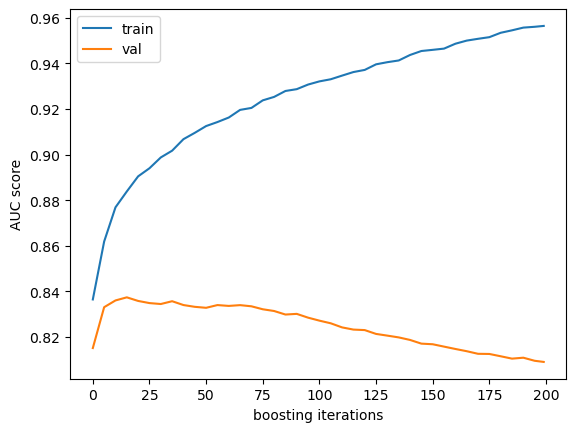

In [40]:
# Plot evaluation scores
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.xlabel("boosting iterations")
plt.ylabel("AUC score")
plt.legend()

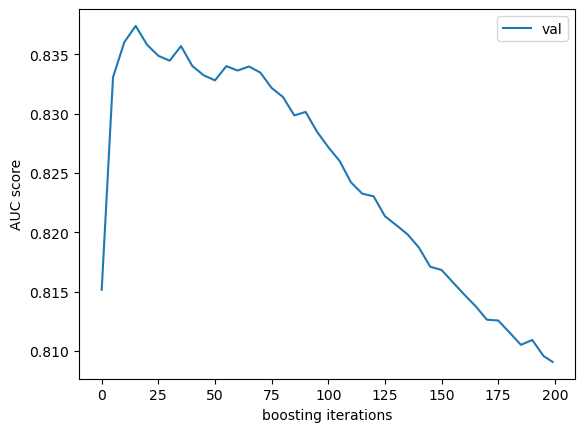

In [41]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.xlabel("boosting iterations")
plt.ylabel("AUC score")
plt.legend()

#### Feature importance

In [42]:
def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    for i, feat in enumerate(features):
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        
    outfile.close()

In [43]:
create_feature_map(list(dv.get_feature_names_out()))

In [44]:
fscore = model.get_fscore('xgb.fmap')
feat_importance = pd.DataFrame(fscore.items(), columns=['feature', 'fscore'])
feat_importance = feat_importance.sort_values('fscore', ascending=False)
feat_importance

,feature,fscore
124,var38,778.0
120,var15,695.0
99,saldo_medio_var5_hace3,329.0
101,saldo_medio_var5_ult3,255.0
98,saldo_medio_var5_hace2,241.0
...,...,...
26,ind_var26_cte,1.0
73,num_var30,1.0
30,ind_var32_cte,1.0
46,num_meses_var12_ult3,1.0


<Axes: ylabel='feature'>

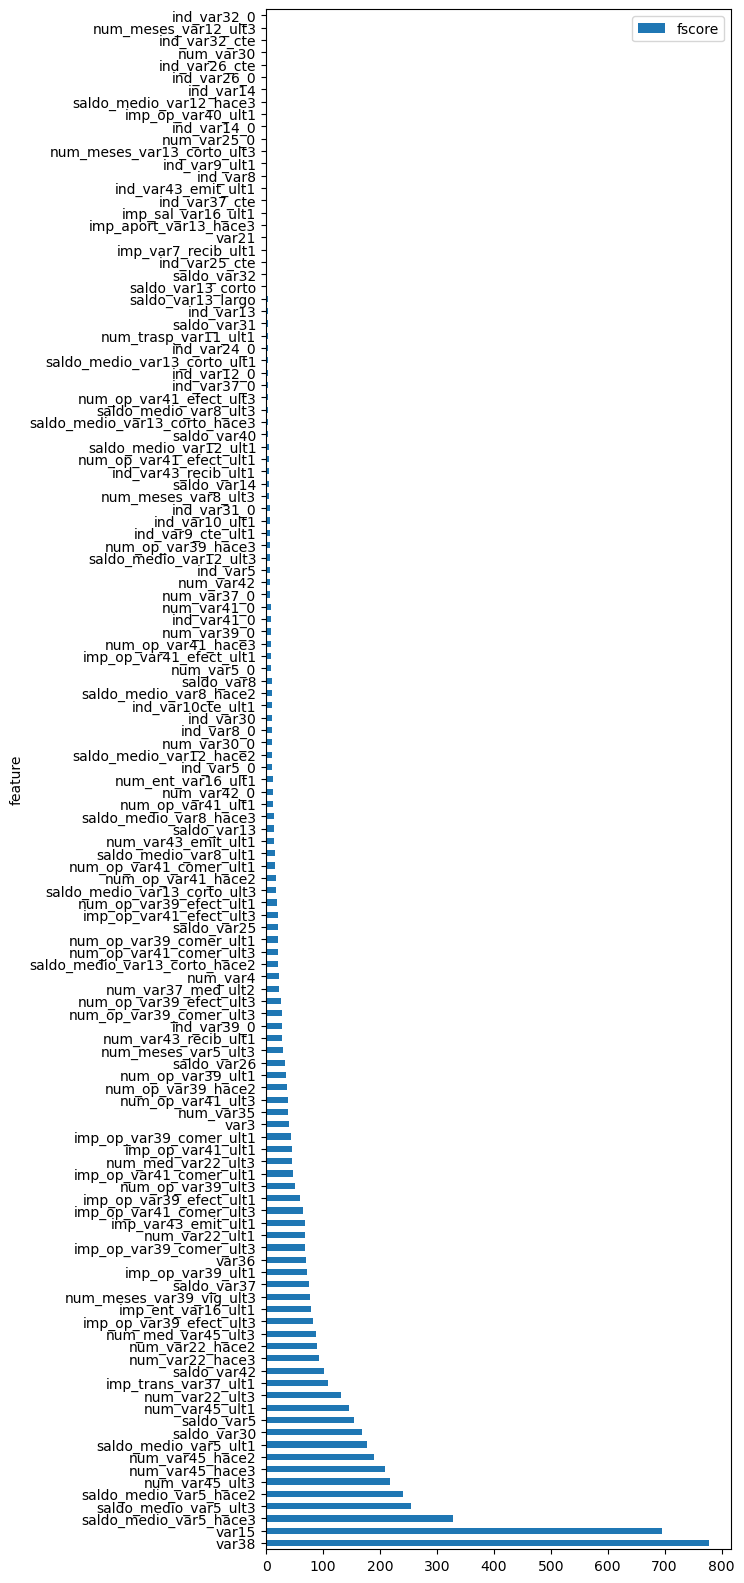

In [45]:
feat_importance.plot(kind='barh', x='feature', y='fscore', figsize=(6, 20))

In [46]:
feat_importance[feat_importance.fscore >= 20]

,feature,fscore
124,var38,778.0
120,var15,695.0
99,saldo_medio_var5_hace3,329.0
101,saldo_medio_var5_ult3,255.0
98,saldo_medio_var5_hace2,241.0
88,num_var45_ult3,218.0
86,num_var45_hace3,208.0
85,num_var45_hace2,189.0
100,saldo_medio_var5_ult1,178.0
112,saldo_var30,169.0


### 5.2 XGBoost parameter tuning

In [47]:
# Prepare data with most important features
cols_imp = list(feat_importance[feat_importance.fscore >= 20].feature)

In [48]:
train_dicts = df_train[cols_imp].to_dict(orient='records')
val_dicts = df_val[cols_imp].to_dict(orient='records')
test_dicts = df_test[cols_imp].to_dict(orient='records')

In [49]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [50]:
features = list(dv.get_feature_names_out())

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
dtest = xgb.DMatrix(X_test, feature_names=features)

In [51]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

#### eta (learning rate)

In [52]:
scores = {}

In [53]:
etas = [0.01, 0.03, 0.05, 0.1]

In [54]:
%%capture output

for eta in etas:    
    xgb_params = {
        'eta': eta, 
        'max_depth': 6,
        'min_child_weight': 1,

        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=600,
                      verbose_eval=5,
                      evals=watchlist)

In [55]:
parse_output = parse_xgb_output(output)
rows_per_eta = len(parse_output) // len(etas)

for i, eta in enumerate(etas): 
    key = 'eta=%s' % (eta)
    start_row = i * rows_per_eta
    end_row = (i + 1) * rows_per_eta
    scores[key] = parse_output[start_row:end_row]

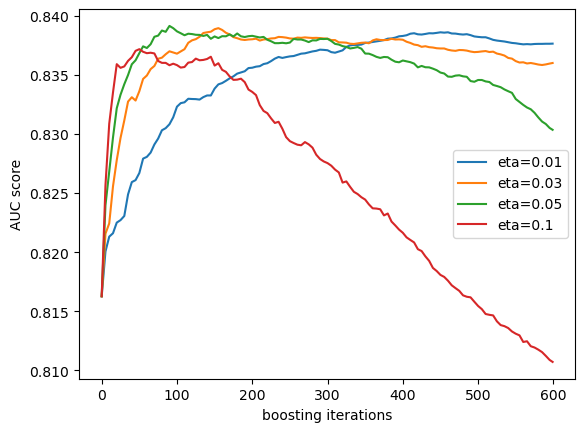

In [56]:
for key, df_score in list(scores.items()):
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)

plt.xlabel('boosting iterations')
plt.ylabel('AUC score')
plt.legend()

Best AUC score at ~450 iterations with an eta of 0.01.

#### max_depth

In [57]:
scores = {}

In [58]:
max_depths = [3, 4, 5, 6, 10]

In [59]:
%%capture output

for max_depth in max_depths:
    xgb_params = {
        'eta': 0.01, 
        'max_depth': max_depth,
        'min_child_weight': 1,
 
        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=600,
                      verbose_eval=5,
                      evals=watchlist)

In [60]:
parse_output = parse_xgb_output(output)
rows_per_depth = len(parse_output) // len(max_depths)

for i, max_depth in enumerate(max_depths):
    key = 'max_depth=%s' % (max_depth)
    start_row = i * rows_per_depth
    end_row = (i + 1) * rows_per_depth
    scores[key] = parse_output[start_row:end_row]

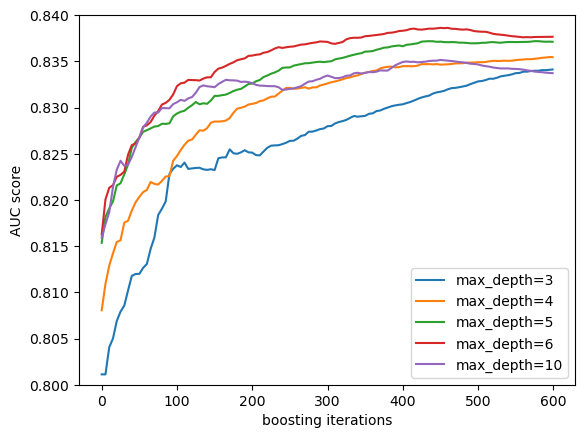

In [61]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.xlabel('boosting iterations')
plt.ylabel('AUC score')
plt.ylim(0.8, 0.84)
plt.legend()

Best AUC scoret ~450 iterations with a max_depth of 6.

#### min_child_weight

In [62]:
scores = {}

In [63]:
min_child_weights = [1, 10, 30]

In [64]:
%%capture output

for min_child_weight in min_child_weights:
    xgb_params = {
        'eta': 0.01, 
        'max_depth': 6,
        'min_child_weight': min_child_weight,

        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=600,
                      verbose_eval=5,
                      evals=watchlist)

In [65]:
parse_output = parse_xgb_output(output)
rows_per_weight = len(parse_output) // len(min_child_weights)

for i, min_child_weight in enumerate(min_child_weights):
    key = 'min_child_weight=%s' % (min_child_weight)
    start_row = i * rows_per_weight
    end_row = (i + 1) * rows_per_weight
    scores[key] = parse_output[start_row:end_row]

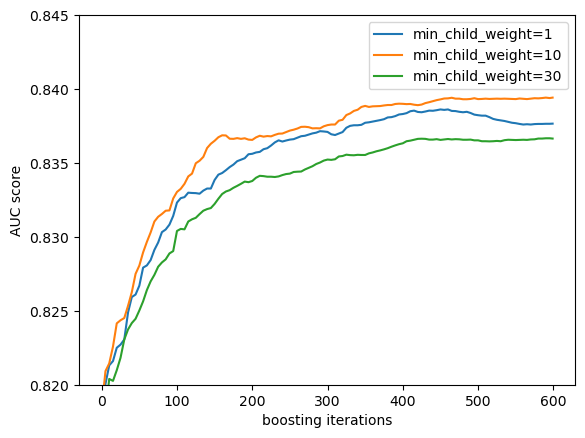

In [66]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.xlabel('boosting iterations')
plt.ylabel('AUC score')
plt.ylim(0.82, 0.845)
plt.legend()

Best AUC score at 600 iterations with a min_child_weight of 10.

#### Training final XGboost model

In [67]:
xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=600)

In [68]:
# Validation
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8394152902814648

In [69]:
# Evaluate AUC on the training dataset
y_pred = model.predict(dtrain)
roc_auc_score(y_train, y_pred)

0.8761959547462279

### 5.3 Evaluating AUC scores

In [70]:
# Validation
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8394152902814648

In [71]:
thresholds = np.linspace(0, 1, 21)

scores_th = []

for t in thresholds:
    score = roc_auc_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores_th.append(score)

0.00 0.500
0.05 0.760
0.10 0.730
0.15 0.676
0.20 0.598
0.25 0.531
0.30 0.512
0.35 0.505
0.40 0.502
0.45 0.501
0.50 0.500
0.55 0.500
0.60 0.500
0.65 0.500
0.70 0.500
0.75 0.500
0.80 0.500
0.85 0.500
0.90 0.500
0.95 0.500
1.00 0.500


Text(0, 0.5, 'AUC score')

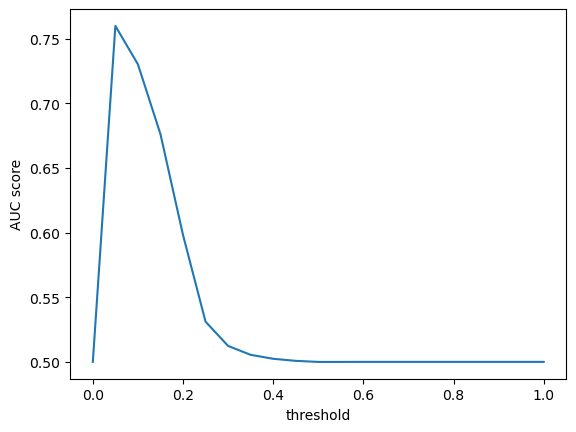

In [72]:
plt.plot(thresholds, scores_th)
plt.xlabel("threshold")
plt.ylabel("AUC score")

Due to class imbalance, for threshold values greater than 0.20, the ROC AUC score is below 0.5, which suggests that the model is performing no better than random chance.

### 5.4 k-fold cross validation

In [73]:
from xgboost import cv

In [74]:
xgb_cv = cv(dtrain=dtrain, params=xgb_params, nfold=3,
            num_boost_round=50, early_stopping_rounds=10,
            metrics="auc", as_pandas=True, seed=1)

<Axes: >

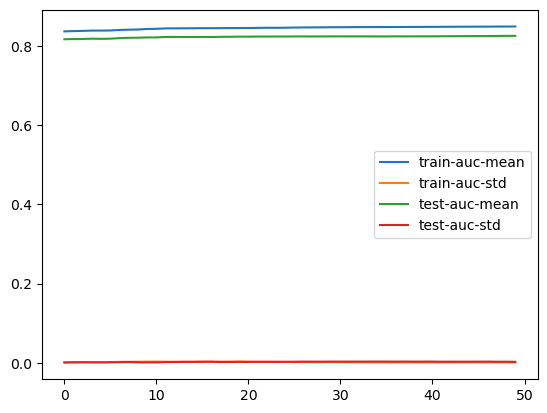

In [75]:
xgb_cv.plot()

### Submit solution to Kaggle

Make predictions

In [76]:
y_pred_sub = model.predict(dtest)
y_pred_sub

array([0.03112138, 0.04144642, 0.00205527, ..., 0.00362264, 0.07481457,
       0.00117044], dtype=float32)

In [77]:
predictions = [int(value) for value in (y_pred_sub >= 0.05)]

Prepare and submit file

In [78]:
df_sub = pd.read_csv('data/sample_submission.csv')

In [79]:
df_sub['TARGET'] = np.array(predictions)

In [80]:
df_sub.tail()

,ID,TARGET
75813,151831,1
75814,151832,0
75815,151833,0
75816,151834,1
75817,151837,0


In [81]:
df_sub.to_csv("submission_xgb.csv", index=False)

In [ ]:
!kaggle competitions submit -c santander-customer-satisfaction -f submission_xgb.csv -m "xgb submission"

View submissions

In [ ]:
!kaggle competitions submissions -c santander-customer-satisfaction

publicScore 0.7506, privateScore 0.73655

## 6. Save model

In [82]:
import pickle

In [83]:
output_file = f'model_xgb.bin'

In [84]:
f_out = open(output_file, 'wb')
pickle.dump((dv, model), f_out)
f_out.close()

In [85]:
# !ls -lh *.bin

In [86]:
with open(output_file, 'wb') as f_out: 
    pickle.dump((dv, model), f_out)

### 6.1 Load trained model

In [87]:
import pickle

In [88]:
input_file = 'model_xgb.bin'

In [89]:
with open(input_file, 'rb') as f_in: 
    dv, model = pickle.load(f_in)

In [91]:
customer = {
    'var38': 117310.979016494,
    'var15': 35,
    'saldo_medio_var5_hace3': 0.0,
    'saldo_medio_var5_ult3': 22.74,
    'saldo_medio_var5_hace2': 25.02,
    'num_var45_ult3': 9,
    'num_var45_hace3': 3,
    'num_var45_hace2': 0,
    'saldo_medio_var5_ult1': 20.43,
    'saldo_var30': 9.66,
    'saldo_var5': 9.66,
    'num_var45_ult1': 6,
    'num_var22_ult3': 0,
    'imp_trans_var37_ult1': 0.0,
    'saldo_var42': 9.66,
    'num_var22_hace3': 0,
    'num_var22_hace2': 0,
    'num_med_var45_ult3': 3,
    'imp_op_var39_efect_ult3': 0.0,
    'imp_ent_var16_ult1': 0.0,
    'num_meses_var39_vig_ult3': 2,
    'saldo_var37': 0.0,
    'imp_op_var39_ult1': 20.34,
    'var36': 99,
    'imp_op_var39_comer_ult3': 20.34,
    'num_var22_ult1': 0,
    'imp_var43_emit_ult1': 0.0,
    'imp_op_var41_comer_ult3': 20.34,
    'imp_op_var39_efect_ult1': 0.0,
    'num_op_var39_ult3': 9,
    'imp_op_var41_comer_ult1': 20.34,
    'num_med_var22_ult3': 0,
    'imp_op_var41_ult1': 20.34,
    'imp_op_var39_comer_ult1': 20.34,
    'var3': 2,
    'num_var35': 6,
    'num_op_var41_ult3': 9,
    'num_op_var39_hace2': 0,
    'num_op_var39_ult1': 9,
    'saldo_var26': 0.0,
    'num_meses_var5_ult3': 2,
    'num_var43_recib_ult1': 0,
    'ind_var39_0': 1,
    'num_op_var39_comer_ult3': 9,
    'num_op_var39_efect_ult3': 0,
    'num_var37_med_ult2': 0,
    'num_var4': 2,
    'saldo_medio_var13_corto_hace2': 0.0,
    'num_op_var41_comer_ult3': 9,
    'num_op_var39_comer_ult1': 9,
    'saldo_var25': 0.0,
    'imp_op_var41_efect_ult3': 0.0
}

In [92]:
X = dv.fit_transform([customer])

In [93]:
import xgboost as xgb

In [94]:
features = list(dv.get_feature_names_out())

In [95]:
xtest = xgb.DMatrix(X, feature_names=features)

In [97]:
y_pred = model.predict(xtest)

In [99]:
print('input:', customer)
print('output:', y_pred)

if(y_pred[0] < 0.05):
    print('Satidfied customer')
else: print('Unsatisfied customer')

input: {'var38': 117310.979016494, 'var15': 35, 'saldo_medio_var5_hace3': 0.0, 'saldo_medio_var5_ult3': 22.74, 'saldo_medio_var5_hace2': 25.02, 'num_var45_ult3': 9, 'num_var45_hace3': 3, 'num_var45_hace2': 0, 'saldo_medio_var5_ult1': 20.43, 'saldo_var30': 9.66, 'saldo_var5': 9.66, 'num_var45_ult1': 6, 'num_var22_ult3': 0, 'imp_trans_var37_ult1': 0.0, 'saldo_var42': 9.66, 'num_var22_hace3': 0, 'num_var22_hace2': 0, 'num_med_var45_ult3': 3, 'imp_op_var39_efect_ult3': 0.0, 'imp_ent_var16_ult1': 0.0, 'num_meses_var39_vig_ult3': 2, 'saldo_var37': 0.0, 'imp_op_var39_ult1': 20.34, 'var36': 99, 'imp_op_var39_comer_ult3': 20.34, 'num_var22_ult1': 0, 'imp_var43_emit_ult1': 0.0, 'imp_op_var41_comer_ult3': 20.34, 'imp_op_var39_efect_ult1': 0.0, 'num_op_var39_ult3': 9, 'imp_op_var41_comer_ult1': 20.34, 'num_med_var22_ult3': 0, 'imp_op_var41_ult1': 20.34, 'imp_op_var39_comer_ult1': 20.34, 'var3': 2, 'num_var35': 6, 'num_op_var41_ult3': 9, 'num_op_var39_hace2': 0, 'num_op_var39_ult1': 9, 'saldo_var26